### Importing Data and Scripts

In [47]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [48]:
# Convention Real:A, Virtual:B
print("Real:A, Virtual:B")
print("Goal A2B")

Real:A, Virtual:B
Goal A2B


### Making Test Data

In [0]:
import glob
train_center = glob.glob("/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Dataset/Center/*.jpg")
train_left = glob.glob("/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Dataset/Left/*.jpg")
train_right = glob.glob("/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Dataset/Right/*.jpg")
print(len(train_center))

3438


In [0]:
for element in [train_center, train_left, train_right]:
  for i in range(len(element)):
    element[i] = element[i].split("/")[-1]

In [0]:
from random import shuffle
shuffle(train_center)
shuffle(train_left)
shuffle(train_right)

In [0]:
from sklearn.model_selection import train_test_split
train_center, test_center = train_test_split(train_center, test_size=0.1)
train_left, test_left = train_test_split(train_left, test_size=0.1)
train_right, test_right = train_test_split(train_right, test_size=0.1)

In [0]:
!mkdir "/content/drive/My Drive/IRON Lab Dataset/Results/test/Center"
!mkdir "/content/drive/My Drive/IRON Lab Dataset/Results/test/Left"
!mkdir "/content/drive/My Drive/IRON Lab Dataset/Results/test/Right"

In [0]:
from shutil import copyfile
for i in test_center:
  copyfile("/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Dataset/Center/"+i, "/content/drive/My Drive/IRON Lab Dataset/Results/test/Center/"+i)
for i in test_left:
  copyfile("/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Dataset/Left/"+i, "/content/drive/My Drive/IRON Lab Dataset/Results/test/Left/"+i)
for i in test_right:
  copyfile("/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Dataset/Right/"+i, "/content/drive/My Drive/IRON Lab Dataset/Results/test/Right/"+i)

In [0]:
print(len(test_center))
print(len(test_left))
print(len(test_right))

344
356
308


In [0]:
# Make Validation Data
train_center = glob.glob("/content/drive/My Drive/IRON Lab Dataset/Results/train/Center/*.jpg")
train_left = glob.glob("/content/drive/My Drive/IRON Lab Dataset/Results/train/Left/*.jpg")
train_right = glob.glob("/content/drive/My Drive/IRON Lab Dataset/Results/train/Right/*.jpg")
print(len(train_center))

for element in [train_center, train_left, train_right]:
  for i in range(len(element)):
    element[i] = element[i].split("/")[-1]

train_center, valid_center = train_test_split(train_center, test_size=0.2)
train_left, valid_left = train_test_split(train_left, test_size=0.2)
train_right, valid_right = train_test_split(train_right, test_size=0.2)

!mkdir "/content/drive/My Drive/IRON Lab Dataset/Results/valid/Center"
!mkdir "/content/drive/My Drive/IRON Lab Dataset/Results/valid/Left"
!mkdir "/content/drive/My Drive/IRON Lab Dataset/Results/valid/Right"

import shutil
for i in valid_center:
  shutil.move("/content/drive/My Drive/IRON Lab Dataset/Results/train/Center/"+i, "/content/drive/My Drive/IRON Lab Dataset/Results/valid/Center/"+i)
for i in valid_left:
  shutil.move("/content/drive/My Drive/IRON Lab Dataset/Results/train/Left/"+i, "/content/drive/My Drive/IRON Lab Dataset/Results/valid/Left/"+i)
for i in valid_right:
  shutil.move("/content/drive/My Drive/IRON Lab Dataset/Results/train/Right/"+i, "/content/drive/My Drive/IRON Lab Dataset/Results/valid/Right/"+i)

838


In [0]:
print(len(valid_center))
print(len(valid_left))
print(len(valid_right))

168
168
168


### Installation


In [49]:
# Install Anaconda
!curl -O https://repo.anaconda.com/archive/Anaconda3-2020.02-Linux-x86_64.sh
!bash ./Anaconda3-2020.02-Linux-x86_64.sh -b -f -p /usr/local

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file Anaconda3-2020.02-Linux-x86_64.sh: 
  0  521M    0   466    0     0   4957      0 30:38:50 --:--:-- 30:38:50  4957
curl: (23) Failed writing body (0 != 466)
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
bash: ./Anaconda3-2020.02-Linux-x86_64.sh: Transport endpoint is not connected


In [0]:
# Install Anaconda packages
# Install necessary libraries
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
!conda install -y -c anaconda pip
!conda install -y -c anaconda pyyaml
!pip install tensorboard tensorboardX

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pip


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2019.11.28         |           py37_0         156 KB  anaconda
    conda-4.8.3                |           py37_0         3.0 MB  anaconda
    openssl-1.1.1d             |       h7b6447c_4         3.7 MB  anaconda
    pip-20.0.2                 |           py37_1         1.9 MB  anaconda
    ------------------------------------------------------------
       

In [0]:
!conda install pytorch torchvision cudatoolkit=10.1 -c pytorch

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 
  - anaconda/linux-64::ca-certificates-2020.1.1-0, anaconda/linux-64::certifi-2019.11.28-py37_0, anaconda/linux-64::conda-4.8.3-py37_0, anaconda/linux-64::openssl-1.1.1d-h7b6447c_4
  - anaconda/linux-64::ca-certificates-2020.1.1-0, anaconda/linux-64::certifi-2019.11.28-py37_0, anaconda/linux-64::openssl-1.1.1d-h7b6447c_4, defaults/linux-64::conda-4.8.3-py37_0
  - anaconda/linux-64::ca-certificates-2020.1.1-0, anaconda/linux-64::conda-4.8.3-py37_0, anaconda/linux-64::openssl-1.1.1d-h7b6447c_4, defaults/linux-64::certifi-2019.11.28-py37_0
  - anaconda/linux-64::ca-certificates-2020.1.1-0, anaconda/linux-64::openssl-1.1.1d-h7b6447c_4, defaults/linux-64::certifi-2019.11.28-py37_0, defaults/linux-64::conda-4.8.3-py37_0
  - anaconda/linux-64::ca-certificates-2020.1.1-0, anaconda/linux-64::conda-4.8.3-py37_0, defaults/linux-64:

In [0]:
!pip install torchfile

  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5711 sha256=cfb0b1af150c3468044ce971cd7d33c7ab329c2d5351983244920c4c57e506d2
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd1e9a8cb7e2f8f37620bb75b
Successfully built torchfile


### Import Data

In [0]:
# Check if data is in the correct place. Mapping is Real:A, Virtual:B
import glob
train_real = glob.glob("/content/drive/My Drive/IRON Lab Dataset/Sim2Real/trainA/*.jpg")
test_real = glob.glob("/content/drive/My Drive/IRON Lab Dataset/Sim2Real/testA/*.jpg")
train_virtual = glob.glob("/content/drive/My Drive/IRON Lab Dataset/Sim2Real/trainB/*.jpg")
test_virtual = glob.glob("/content/drive/My Drive/IRON Lab Dataset/Sim2Real/testB/*.jpg")


In [0]:
# Check the length of all variables even though we wont use them just to know there is nothing fishy about the data
len(train_virtual)

2262

### Inference UNIT

In [0]:
%cd "/content/drive/My Drive/IRON Lab Dataset/Final Backup DO NOT DELETE/UNIT"
!ls

/content/drive/My Drive/IRON Lab Dataset/Final Backup DO NOT DELETE/UNIT
configs     docs	models	     README.md	    test.py	 utils.py
data.py     inputs	networks.py  results	    trainer.py
datasets    LICENSE.md	outputs      scripts	    train.py
Dockerfile  logs	__pycache__  test_batch.py  TUTORIAL.md


In [0]:
!python test.py --trainer UNIT --config configs/unit_sim2real_run_1.yaml --input "/content/drive/My Drive/IRON Lab Dataset/Sim2Real/trainA/GOPR008231965.jpg" --output_folder "/content/drive/My Drive/IRON Lab Dataset/Results" --checkpoint models/gen_01000000.pt --a2b 1

/content/drive/My Drive/IRON Lab Dataset/Final Backup DO NOT DELETE/UNIT/utils.py:100: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)


In [0]:
print("Works, YAAAAYYY")

Works, YAAAAYYY


In [0]:
!mkdir "/content/drive/My Drive/IRON Lab Dataset/Results/Left"
!mkdir "/content/drive/My Drive/IRON Lab Dataset/Results/Center"
!mkdir "/content/drive/My Drive/IRON Lab Dataset/Results/Right"

In [0]:
# Do not execute this cell
PATHS:
Input_Real_Left: "/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Left"
Output_Left: "/content/drive/My Drive/IRON Lab Dataset/Results/Left"

### Running the test_batch.py full folder sim_2_real 

In [0]:
%%writefile test_batch.py
"""
Copyright (C) 2018 NVIDIA Corporation.  All rights reserved.
Licensed under the CC BY-NC-SA 4.0 license (https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode).
"""
from __future__ import print_function
from utils import get_config, get_data_loader_folder, pytorch03_to_pytorch04
from trainer import MUNIT_Trainer, UNIT_Trainer
import argparse
from torch.autograd import Variable
from data import ImageFolder
import torchvision.utils as vutils
try:
    from itertools import izip as zip
except ImportError: # will be 3.x series
    pass
import sys
import torch
import os


parser = argparse.ArgumentParser()
parser.add_argument('--config', type=str, default='configs/edges2handbags_folder', help='Path to the config file.')
parser.add_argument('--input_folder', type=str, help="input image folder")
parser.add_argument('--output_folder', type=str, help="output image folder")
parser.add_argument('--checkpoint', type=str, help="checkpoint of autoencoders")
parser.add_argument('--a2b', type=int, help="1 for a2b and others for b2a", default=1)
parser.add_argument('--seed', type=int, default=1, help="random seed")
parser.add_argument('--num_style',type=int, default=10, help="number of styles to sample")
parser.add_argument('--synchronized', action='store_true', help="whether use synchronized style code or not")
parser.add_argument('--output_only', action='store_true', help="whether use synchronized style code or not")
parser.add_argument('--output_path', type=str, default='.', help="path for logs, checkpoints, and VGG model weight")
parser.add_argument('--trainer', type=str, default='MUNIT', help="MUNIT|UNIT")

opts = parser.parse_args()


torch.manual_seed(opts.seed)
torch.cuda.manual_seed(opts.seed)

# Load experiment setting
config = get_config(opts.config)
input_dim = config['input_dim_a'] if opts.a2b else config['input_dim_b']

# Setup model and data loader
image_names = ImageFolder(opts.input_folder, transform=None, return_paths=True)
data_loader = get_data_loader_folder(opts.input_folder, 1, False, new_size=config['new_size'], crop=False)

config['vgg_model_path'] = opts.output_path
if opts.trainer == 'MUNIT':
    style_dim = config['gen']['style_dim']
    trainer = MUNIT_Trainer(config)
elif opts.trainer == 'UNIT':
    trainer = UNIT_Trainer(config)
else:
    sys.exit("Only support MUNIT|UNIT")

try:
    state_dict = torch.load(opts.checkpoint)
    trainer.gen_a.load_state_dict(state_dict['a'])
    trainer.gen_b.load_state_dict(state_dict['b'])
except:
    state_dict = pytorch03_to_pytorch04(torch.load(opts.checkpoint))
    trainer.gen_a.load_state_dict(state_dict['a'])
    trainer.gen_b.load_state_dict(state_dict['b'])

trainer.cuda()
trainer.eval()
encode = trainer.gen_a.encode if opts.a2b else trainer.gen_b.encode # encode function
decode = trainer.gen_b.decode if opts.a2b else trainer.gen_a.decode # decode function

if opts.trainer == 'MUNIT':
    # Start testing
    style_fixed = Variable(torch.randn(opts.num_style, style_dim, 1, 1).cuda(), volatile=True)
    for i, (images, names) in enumerate(zip(data_loader, image_names)):
        print(names[1])
        images = Variable(images.cuda(), volatile=True)
        content, _ = encode(images)
        style = style_fixed if opts.synchronized else Variable(torch.randn(opts.num_style, style_dim, 1, 1).cuda(), volatile=True)
        for j in range(opts.num_style):
            s = style[j].unsqueeze(0)
            outputs = decode(content, s)
            outputs = (outputs + 1) / 2.
            # path = os.path.join(opts.output_folder, 'input{:03d}_output{:03d}.jpg'.format(i, j))
            basename = os.path.basename(names[1])
            path = os.path.join(opts.output_folder+"_%02d"%j,basename)
            if not os.path.exists(os.path.dirname(path)):
                os.makedirs(os.path.dirname(path))
            vutils.save_image(outputs.data, path, padding=0, normalize=True)
        if not opts.output_only:
            # also save input images
            vutils.save_image(images.data, os.path.join(opts.output_folder, 'input{:03d}.jpg'.format(i)), padding=0, normalize=True)
elif opts.trainer == 'UNIT':
    # Start testing
    for i, (images, names) in enumerate(zip(data_loader, image_names)):
        print(names[1])
        images = Variable(images.cuda(), volatile=True)
        content, _ = encode(images)

        outputs = decode(content)
        outputs = (outputs + 1) / 2.
        # path = os.path.join(opts.output_folder, 'input{:03d}_output{:03d}.jpg'.format(i, j))
        basename = os.path.basename(names[1])
        path = os.path.join(opts.output_folder,basename)
        if not os.path.exists(os.path.dirname(path)):
            os.makedirs(os.path.dirname(path))
        vutils.save_image(outputs.data, path, padding=0, normalize=True)
        if not opts.output_only:
            # also save input images
            vutils.save_image(images.data, os.path.join(opts.output_folder, 'input{:03d}.jpg'.format(i)), padding=0, normalize=True)
else:
    pass


Writing test_batch.py


In [0]:
# Left
!python test_batch.py --trainer UNIT --config configs/unit_sim2real_run_1.yaml --input_folder "/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Left" --output_folder "/content/drive/My Drive/IRON Lab Dataset/Results/Left" --checkpoint models/gen_01000000.pt --a2b 0

/content/drive/My Drive/IRON Lab Dataset/Final Backup DO NOT DELETE/UNIT/utils.py:100: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Left/left00000.jpg
test_batch.py:96: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  images = Variable(images.cuda(), volatile=True)
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Left/left00030.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Left/left00060.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Left/left00090.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Left/left00120.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Left/left00150.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/

In [0]:
# Center
!python test_batch.py --trainer UNIT --config configs/unit_sim2real_run_1.yaml --input_folder "/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Center" --output_folder "/content/drive/My Drive/IRON Lab Dataset/Results/Center" --checkpoint models/gen_01000000.pt --a2b 0

/content/drive/My Drive/IRON Lab Dataset/Final Backup DO NOT DELETE/UNIT/utils.py:100: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Center/center00000.jpg
test_batch.py:96: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  images = Variable(images.cuda(), volatile=True)
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Center/center00030.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Center/center00060.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Center/center00090.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Center/center00120.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Center/center00150.jpg
/content/drive/My Drive/IRON Lab D

In [0]:
# Right
!python test_batch.py --trainer UNIT --config configs/unit_sim2real_run_1.yaml --input_folder "/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Right" --output_folder "/content/drive/My Drive/IRON Lab Dataset/Results/Right" --checkpoint models/gen_01000000.pt --a2b 0

/content/drive/My Drive/IRON Lab Dataset/Final Backup DO NOT DELETE/UNIT/utils.py:100: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Right/right00000.jpg
test_batch.py:96: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  images = Variable(images.cuda(), volatile=True)
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Right/right00030.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Right/right00060.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Right/right00090.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Right/right00120.jpg
/content/drive/My Drive/IRON Lab Dataset/ExtractedDataset/Frames/Right/right00150.jpg
/content/drive/My Drive/IRON Lab Dataset/Extra

In [0]:
!mkdir "/content/drive/My Drive/IRON Lab Dataset/Input"

In [0]:
!mkdir "/content/drive/My Drive/IRON Lab Dataset/Input/Left"
!mkdir "/content/drive/My Drive/IRON Lab Dataset/Input/Center"
!mkdir "/content/drive/My Drive/IRON Lab Dataset/Input/Right"

In [0]:
import glob
input_left = glob.glob("Results/Left/input*.jpg")
input_center = glob.glob("Results/Center/input*.jpg")
input_right = glob.glob("Results/Right/input*.jpg")
print(len(input_left))
print(len(input_right))
print(len(input_center))

838
838
838


In [0]:
for i in range(len(input_left)):
  input_left[i] = input_left[i].split("/")[-1]
  input_right[i] = input_right[i].split("/")[-1]
  input_center[i] = input_center[i].split("/")[-1]

In [0]:
import os
import shutil

for i in range(len(input_left)):
  shutil.move("/content/drive/My Drive/IRON Lab Dataset/Results/Center/"+input_center[i],"/content/drive/My Drive/IRON Lab Dataset/Input/Center/"+input_center[i])
  shutil.move("/content/drive/My Drive/IRON Lab Dataset/Results/Left/"+input_left[i],"/content/drive/My Drive/IRON Lab Dataset/Input/Left/"+input_left[i])
  shutil.move("/content/drive/My Drive/IRON Lab Dataset/Results/Right/"+input_right[i],"/content/drive/My Drive/IRON Lab Dataset/Input/Right/"+input_right[i])

### Image Generation Done! Start Classification!

In [0]:
!conda install -c pytorch -c fastai fastai

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - fastai


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cymem-2.0.2                |   py37he1b5a44_0          40 KB  fastai
    cython-blis-0.2.4          |   py37h516909a_1         3.1 MB  fastai
    dataclasses-0.6            |             py_0          19 KB  fastai
    fastai-1.0.60              |                1         176 KB  fastai
    fastprogress-0.2.2         |             py_0          15 KB  fastai
    murmurhash-1.0.2           |   py37he6710b0_0          27 KB
    nvidia-ml-py3-7.352.0      |             py_0          22 K

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy

In [2]:
%cd /content/drive/My Drive/IRON\ Lab\ Dataset

/content/drive/My Drive/IRON Lab Dataset


In [0]:
path = '/content/drive/My Drive/IRON Lab Dataset/Results'
size = 256
bs = 64

In [4]:
data = ImageDataBunch.from_folder('/content/drive/My Drive/IRON Lab Dataset/Results',
                                  train="train", valid="valid",
                                  size=size, 
                                  bs=bs)
data_test = ImageDataBunch.from_folder('/content/drive/My Drive/IRON Lab Dataset/Results',
                                  train="train", valid="test",
                                  size=size, 
                                  bs=bs)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [5]:
data.normalize(imagenet_stats)
data_test.normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

ImageDataBunch;

Train: LabelList (2010 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Left,Left,Left,Left,Left
Path: /content/drive/My Drive/IRON Lab Dataset/Results;

Valid: LabelList (1008 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Center,Center,Center,Center,Center
Path: /content/drive/My Drive/IRON Lab Dataset/Results;

Test: None

In [6]:
learner = create_cnn(data, models.resnet34, metrics=[accuracy], callback_fns=ShowGraph)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [7]:
print(data.classes)

['Center', 'Left', 'Right']


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


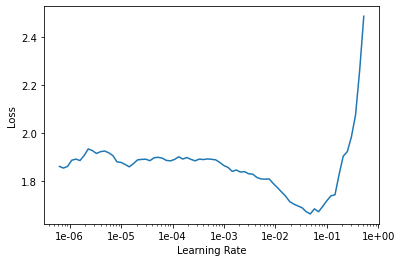

In [8]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.624263,1.085261,0.625000,00:09
1,1.173788,0.746598,0.714286,00:09
2,0.813093,0.734872,0.734127,00:09
3,0.557878,0.574497,0.805556,00:09
4,0.362257,0.532248,0.813492,00:09
5,0.229172,0.510076,0.819444,00:09


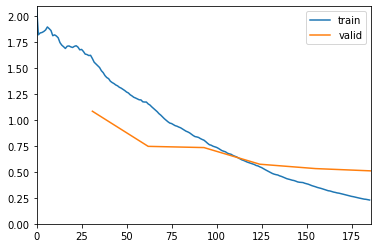

In [9]:
learner.fit_one_cycle(6, max_lr=slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.089704,0.441537,0.833333,00:10
1,0.061143,0.437144,0.869048,00:10
2,0.049616,0.525257,0.845238,00:10
3,0.072044,0.531520,0.863095,00:10
4,0.073407,0.304838,0.914683,00:10
5,0.061095,0.283550,0.924603,00:10
6,0.041638,0.238399,0.920635,00:10
7,0.024358,0.203771,0.948413,00:10
8,0.016083,0.164880,0.952381,00:10
9,0.011352,0.188126,0.948413,00:10


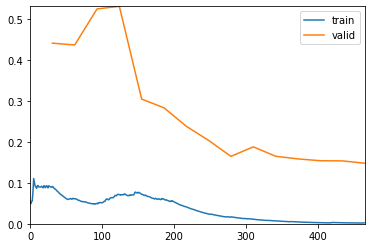

In [10]:
learner.unfreeze()
learner.fit_one_cycle(15, max_lr=slice(1e-5, 1e-3))

In [0]:
data.valid_dl = data_test.valid_dl

epoch,train_loss,valid_loss,accuracy,time
0,0.000856,3.808331,0.427579,00:55
1,0.001844,3.798602,0.428571,00:54
2,0.003044,4.284596,0.412698,00:54
3,0.007979,5.311174,0.412698,00:54
4,0.032152,4.554436,0.472222,00:54
5,0.071315,4.176904,0.462302,00:54
6,0.050697,3.615591,0.479167,00:54
7,0.031061,3.333279,0.500000,00:54
8,0.018086,3.628967,0.474206,00:54
9,0.013109,3.919831,0.472222,00:54


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

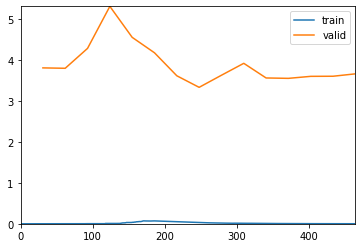

Streaming output truncated to the last 5000 lines.
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old beha

In [46]:
learner.fit_one_cycle(15, max_lr=slice(1e-5, 1e-3))